# Execute the code below

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
link = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [6]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name).

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge.

In [7]:
# Charger les données pour l'année 2018
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
# Vérifier si les deux datasets ont la même longueur
print(df_main.head())
print(df_opinion.head())


         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

In [8]:
# Your code here :

# Vérifier les noms des colonnes dans les DataFrames
print("Colonnes de df_main : ", df_main.columns)

print()
print()
print()

print("Colonnes de df_opinion : ", df_opinion.columns)

print()
print()
print()
df_2018 = pd.merge(df_main, df_opinion, left_on='DATE', right_on='date', how='left')

# les 5 premières lignes du DataFrame 2018
print(df_2018.head())

Colonnes de df_main :  Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C'],
      dtype='object')



Colonnes de df_opinion :  Index(['date', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR',
       'OPINION'],
      dtype='object')



         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERAT

### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:**
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [9]:
# You should now probably drop the "date" column.
# This column is incomplete, it were provided from the opinion file.
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df_2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [10]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df_2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df_2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [11]:
# Your code here :
#ce code pour les revisions c'est pour trouver les valeurs manquantes dans la colonne ci-dessous.

#dabord on selection la colonne qui contient des valeurs manquante"
colonne = 'MAX_TEMPERATURE_C'

#utiliser la methode isna() pour ID les VM
valeurs_manquante = df_2018[colonne].isna()

#sur ces même colonne on séléctionne les lignes des VM
dates_manquantes = df_2018.loc[valeurs_manquante, 'DATE']

print(dates_manquantes)

Series([], Name: DATE, dtype: object)


In [12]:
# You code here :
# nous on doit faire ceci sur toutes les colonnes donc on va faire logiquement une boucle , un for semble être la meilleurs et seul solution possible içi .

for colonne in df_2018.columns:
    #dabord isna() pour ID les VM de la colonne sur la quel nous somme (grâce au for)
    VM = df_2018[colonne].isna()

    #on ce place sur les lignes
    DM = df_2018.loc[VM,'DATE']

    #on affiche
    if not DM.empty:
      print(f" Dates des valeurs manquantes dans la colonne {colonne} :")
      print(DM)
      print()

 Dates des valeurs manquantes dans la colonne WEATHER_CODE_EVENING :
18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12-13
349    2018-12-16
Name: DATE, dtype: object

 Dates des valeurs manquantes dans la colonne TOTAL_SNOW_MM :
18     2018-01-19
31     2018-02-01
66     2018-03-08
100    2018-04-11
118    2018-04-29
143    2018-05-24
152    2018-06-02
163    2018-06-13
165    2018-06-15
175    2018-06-25
184    2018-07-04
191    2018-07-11
194    2018-07-14
197    2018-07-17
204    2018-07-24
220    2018-08-09
225    2018-08-14
234    2018-08-23
266    2018-09-24
317    2018-11-14
321    2018-11-18
325    2018-11-22
346    2018-12

In [13]:
# on voit bien qu'il manque des valeurs (24 sur 5 colonne)
print(df_2018.isna().sum())

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64


## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [14]:
# Just execute the code below :
df_2018['flag'] = df_2018['OPINION'].isna()
df_2018['flag'].value_counts()

,count
flag,
False,341
True,24


## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

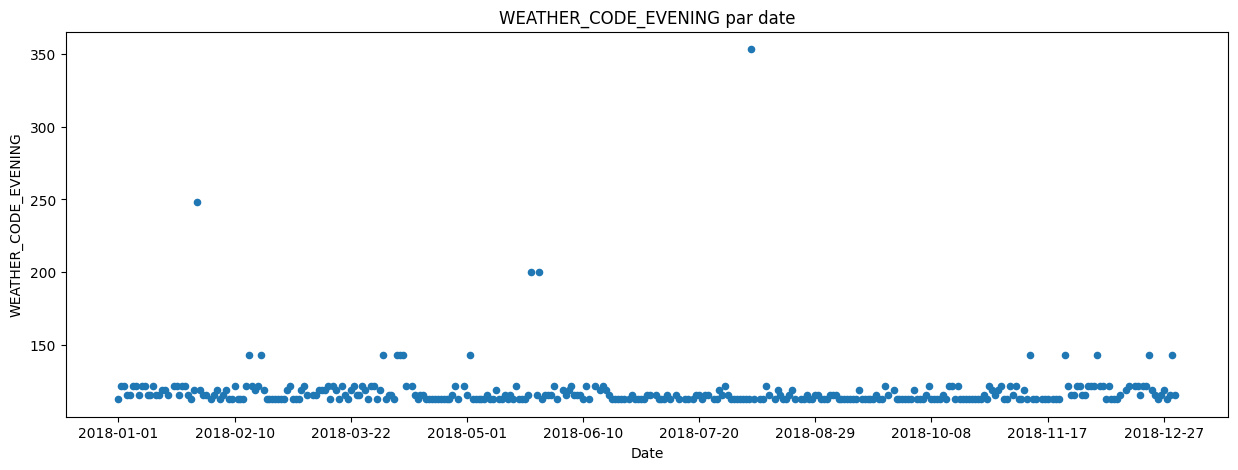

In [15]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
scatter = df_2018.plot.scatter(x='DATE', y='WEATHER_CODE_EVENING', figsize=(15,5),title='WEATHER_CODE_EVENING par date', xlabel='Date', ylabel='WEATHER_CODE_EVENING')
scatter.set_xticks(df_2018['DATE'][::40])


#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

<Axes: >

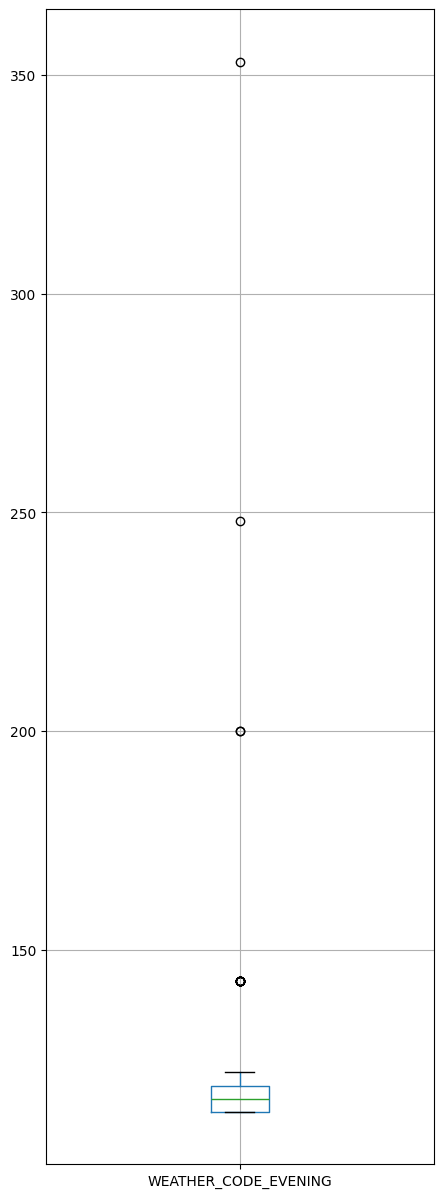

In [16]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df_2018.boxplot(column = 'WEATHER_CODE_EVENING', figsize=(5,15))
#c'est trop moche mdrr attention à l'utilisation de la boxplot

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [17]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

#utiliser le for i in range, mieux que faire un tab de 0.1 0.2 0.3 ..... CHIANT
print(df_2018['WEATHER_CODE_EVENING'].quantile([i/10 for i in range(1,10)]))
print(f"Min : {df_2018['WEATHER_CODE_EVENING'].min()}")
print(f"Max : {df_2018['WEATHER_CODE_EVENING'].max()}")

0.1    113.0
0.2    113.0
0.3    113.0
0.4    113.0
0.5    116.0
0.6    116.0
0.7    119.0
0.8    122.0
0.9    122.0
Name: WEATHER_CODE_EVENING, dtype: float64
Min : 113.0
Max : 353.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [18]:
# Hop ! Your code here :

mean_weather_column = df_2018['WEATHER_CODE_EVENING'].mean()      #You have to complete this
df_2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column,
                                      inplace = False) # When you are OK, you can replace this argument by True
df_2018['WEATHER_CODE_EVENING'].value_counts()

,count
WEATHER_CODE_EVENING,
113.0,154
116.0,78
122.0,59
119.0,34
143.0,12
200.0,2
248.0,1
353.0,1


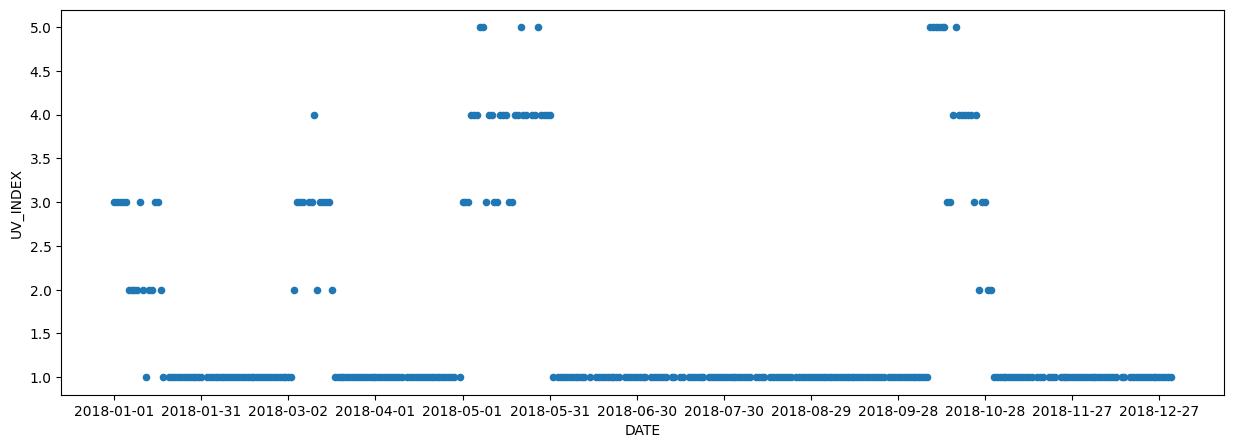

In [19]:
scat3 = df_2018.plot.scatter(
                    x='DATE',
                    y='UV_INDEX',
                    figsize=(15,5)
                    )
scat3.set_xticks(df_2018['DATE'][::30])

In [20]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df_2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  24 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

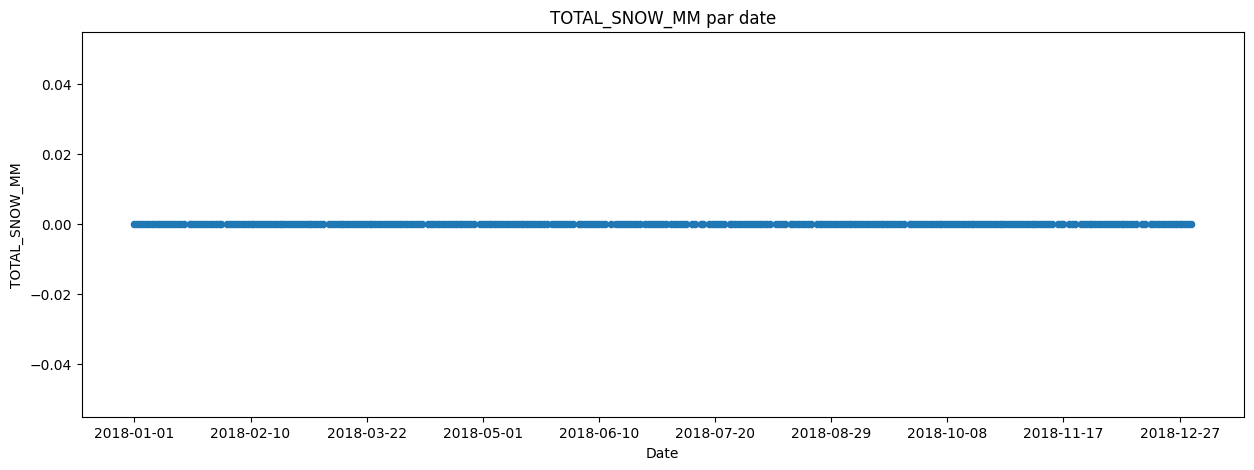

In [21]:
# Your code here

scatter2 = df_2018.plot.scatter(x='DATE', y='TOTAL_SNOW_MM', figsize=(15,5),title='TOTAL_SNOW_MM par date', xlabel='Date', ylabel='TOTAL_SNOW_MM')
scatter2.set_xticks(df_2018['DATE'][::40])

In [22]:
# on remplace ==>
val = df_2018['TOTAL_SNOW_MM'].mean()
df_2018['TOTAL_SNOW_MM'].fillna(val,
                                      inplace = True)
df_2018['TOTAL_SNOW_MM'].value_counts()

<ipython-input-22-1a52825a284f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2018['TOTAL_SNOW_MM'].fillna(val,


,count
TOTAL_SNOW_MM,
0.0,365


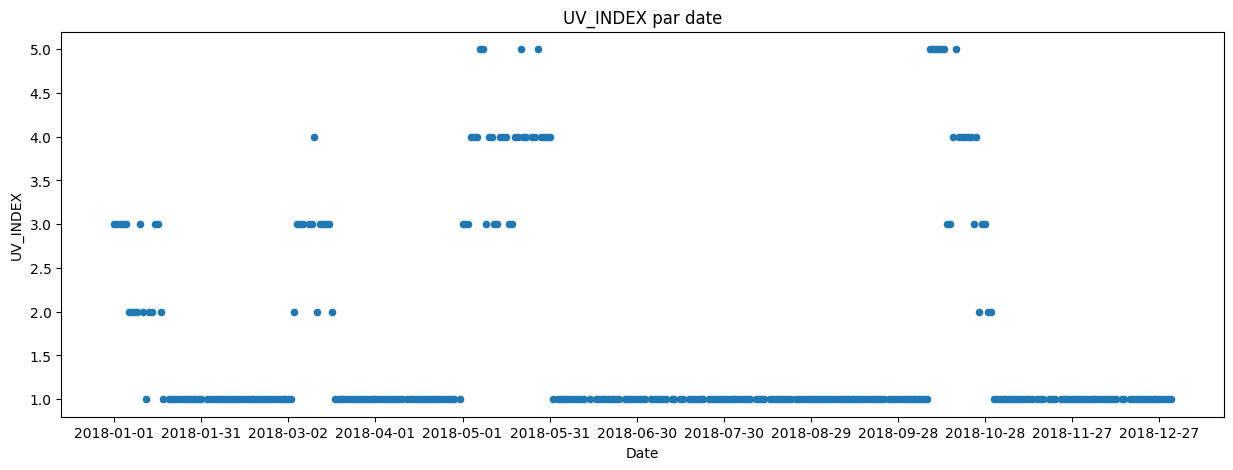

In [23]:
scatter3 = df_2018.plot.scatter(
                    x='DATE',
                    y='UV_INDEX',
                    figsize=(15,5),
                    title='UV_INDEX par date',
                    xlabel='Date',
                    ylabel='UV_INDEX'
                    )
scatter3.set_xticks(df_2018['DATE'][::30])

In [24]:
val2 = df_2018['UV_INDEX'].median()
df_2018['UV_INDEX'].fillna(val2,
                                      inplace = True)
df_2018['UV_INDEX'].value_counts()

<ipython-input-24-b9b458d8741e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2018['UV_INDEX'].fillna(val2,


,count
UV_INDEX,
1.0,284
3.0,30
4.0,26
2.0,14
5.0,11


### 3.3 - Next column :
SUNHOUR

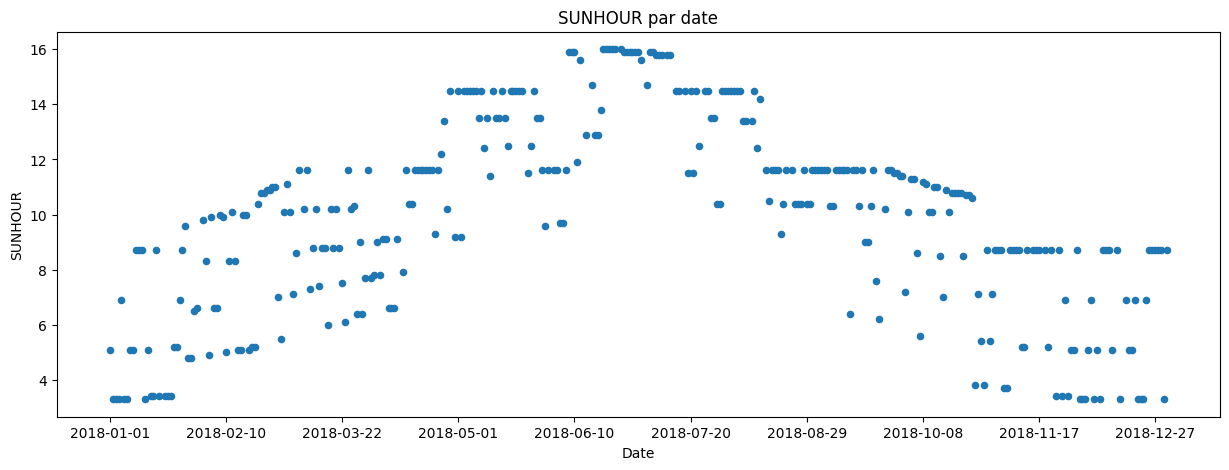

In [25]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

scatter4 = df_2018.plot.scatter(x='DATE', y='SUNHOUR', figsize=(15,5),title='SUNHOUR par date', xlabel='Date', ylabel='SUNHOUR')
scatter4.set_xticks(df_2018['DATE'][::40])

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

In [26]:
# Your code here

df_2018['SUNHOUR'] = df_2018['SUNHOUR'].fillna(method='ffill')
df_2018['SUNHOUR'].value_counts()

<ipython-input-26-e03841414cb2>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2018['SUNHOUR'] = df_2018['SUNHOUR'].fillna(method='ffill')


,count
SUNHOUR,
11.6,45
8.7,34
14.5,34
3.3,17
5.1,15
...,...
5.5,1
13.8,1
6.0,1


### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [27]:
# Your code here

df_2018['OPINION'] = df_2018['OPINION'].fillna('unknown')
df_2018['OPINION'].value_counts()

,count
OPINION,
good,91
very bad,82
bad,79
not good not bad,68
unknown,24
very good,21


## Now, each axis should have 365 non-null values.

In [28]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

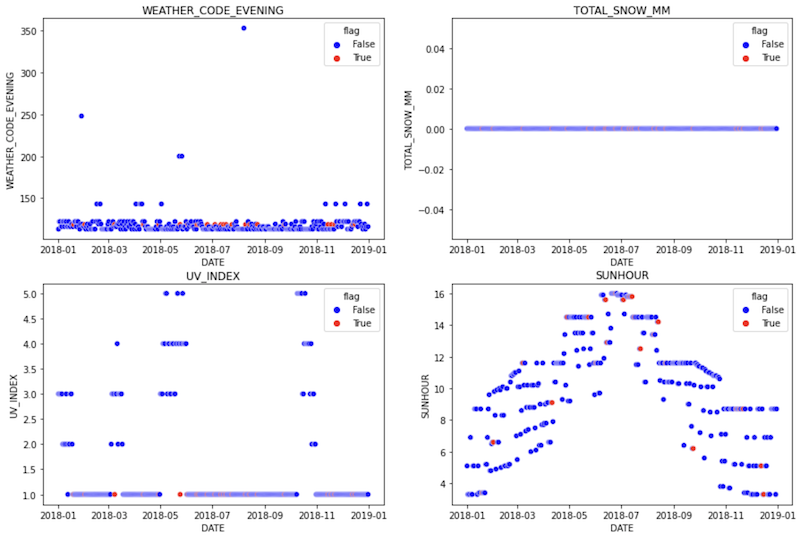

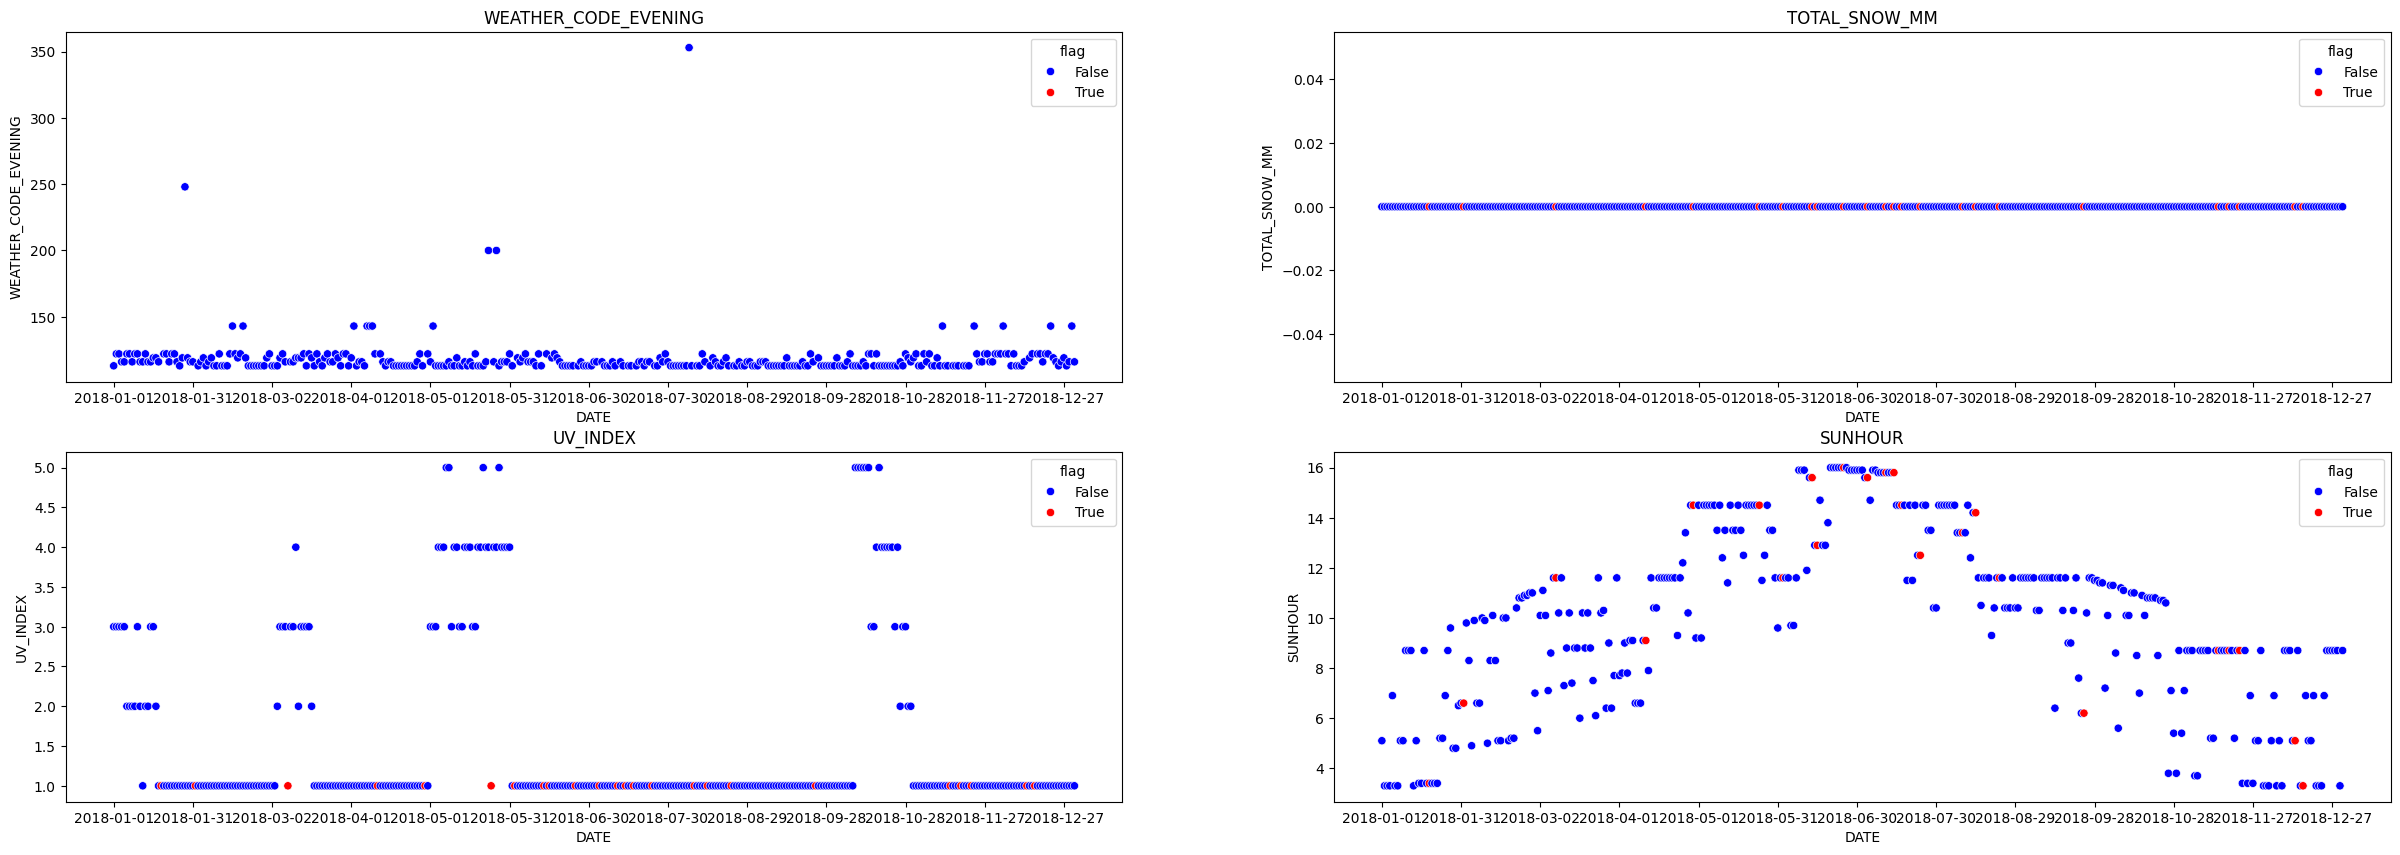

In [29]:
fig, ax =plt.subplots(2, 2, figsize=(30,10))
sns.scatterplot(data=df_2018,
                x="DATE",
                y="WEATHER_CODE_EVENING",
                ax = ax[0,0],
                hue="flag",
                palette=['blue','red']
                )
ax[0,0].set_title("WEATHER_CODE_EVENING")
ax[0, 0].set_xticks(df_2018["DATE"].iloc[::30])

sns.scatterplot(data=df_2018,
                x="DATE",
                y="TOTAL_SNOW_MM",
                ax = ax[0,1],
                hue="flag",
                palette=['blue','red']
                )
ax[0,1].set_title("TOTAL_SNOW_MM")
ax[0,1].set_xticks(df_2018["DATE"].iloc[::30])

sns.scatterplot(data=df_2018,
                x="DATE",
                y="UV_INDEX",
                ax = ax[1,0],
                hue="flag",
                palette=['blue','red']
                )
ax[1,0].set_title("UV_INDEX")
ax[1,0].set_xticks(df_2018["DATE"].iloc[::30])

sns.scatterplot(data=df_2018,
                x="DATE",
                y="SUNHOUR",
                ax = ax[1,1],
                hue="flag",
                palette=['blue','red']
                )
ax[1,1].set_title("SUNHOUR")
ax[1,1].set_xticks(df_2018["DATE"].iloc[::30])
plt.show()

Missions de cette quête :

Crée une fonction translate qui traduit chacune des 5 valeurs possibles présente dans OPINION en français. Ta fonction doit prendre un str en paramètre, et retourner un autre str avec la traduction. Par exemple : translate("bad") doit retourner "mauvais". Idem pour very bad, not good not bad, good et very good. Tu peux utiliser un dictionnaire dict, ou bien des conditions imbriquées (le dictionnaire est plus élégant).
Attention, tu dois prévoir le cas où l'argument fourni n'est pas l'une des 5 valeurs, et retourner alors le texte inchangé. Par exemple : translate("hello") doit retourner "hello".*

Applique avec apply ta fonction à la Série OPINION, vérifie que ca fonctionne, puis stocke le résultat dans cette même colonne OPINION.
Utilise apply pour créer une nouvelle colonne MONTH qui contiendra le numéro du mois (de 1 à 12). Tu peux définir une fonction, ou utiliser une fonction lambda.
Utilise apply pour créer une nouvelle colonne DAY qui contiendra le numéro du jour (de 1 à 31). Tu peux définir une fonction, ou utiliser une fonction lambda.
Concatène les lignes du DataFrame 2018, avec celles de 2019 (tu as dû l'importer tout en haut de ton notebook).
Tu dois obtenir un DataFrame avec 730 lignes (365 * 2) et 25 colonnes :

20 colonnes communes
2 colonnes MONTH et DAY communes également
1 colonne flag dédiée à 2018
2 colonnes dédiées à 2019 : WEATHER_CODE_MORNING et WEATHER_CODE_NOON
Utilise apply pour créer une 26e colonne YEAR qui contiendra le numéro de l'année (2018 ou 2019). Tu peux définir une fonction, ou utiliser une fonction lambda.
Trace les 4 graphiques suivants pour comparer 2018 et 2019 :
Histogramme de la vitesse du vent
Boxplots pour les précipitations
Scatterplots pour le SUNHOUR et la date
Violinplots pour la température maximale
Sur chaque graphique, on pourra lire si 2018 et 2019 sont différents ou similaires, alors utilisez de la couleur pour bien les distinguer !
Après l'analyse technique, voici le moment de l'interprétation métier. D'après toi, quelle année a eu la meilleure météo ? 2018 ou 2019 ? Sur quels critères te bases-tu ?


In [30]:
def translate(opinion):
    # Création d'un dictionnaire pour les traductions
    translations = {
        "bad": "mauvais",
        "very bad": "très mauvais",
        "not good not bad": "ni bon ni mauvais",
        "good": "bon",
        "very good": "très bon"
    }

    # Utilisation de la méthode get() du dictionnaire pour retourner la traduction
    # Si la clé n'est pas trouvée, get() retourne la valeur par défaut, qui est l'opinion originale
    return translations.get(opinion, opinion)

# Tests
print(translate("bad"))  # Doit retourner "mauvais"
print(translate("very bad"))  # Doit retourner "très mauvais"
print(translate("not good not bad"))  # Doit retourner "ni bon ni mauvais"
print(translate("good"))  # Doit retourner "bon"
print(translate("very good"))  # Doit retourner "très bon"
print(translate("hello"))  # Doit retourner "hello"

mauvais
très mauvais
ni bon ni mauvais
bon
très bon
hello


In [32]:
df_2018_2 = df_2018.copy()
df_2018_2['OPINION'] = df_2018_2['OPINION'].apply(translate)
print(df_2018_2['OPINION'].head())

0    mauvais
1    mauvais
2    mauvais
3    mauvais
4    mauvais
Name: OPINION, dtype: object


In [34]:
df_2018_2['DATE'] = pd.to_datetime(df_2018_2['DATE'])

df_2018_2['MONTH'] = df_2018_2['DATE'].apply(lambda x: x.month)

print(df_2018_2)

          DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2018-01-01                 12                  8                 61   
1   2018-01-02                 13                  6                 26   
2   2018-01-03                 15                 10                 40   
3   2018-01-04                 14                 11                 45   
4   2018-01-05                 12                  7                 21   
..         ...                ...                ...                ...   
360 2018-12-27                  7                  2                  6   
361 2018-12-28                  7                  2                  8   
362 2018-12-29                  7                  1                  6   
363 2018-12-30                  9                  4                  6   
364 2018-12-31                  9                  5                 10   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                        9

In [36]:
df_2018_2['DAY'] = df_2018_2['DATE'].apply(lambda x: x.day)

print(df_2018_2)

          DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2018-01-01                 12                  8                 61   
1   2018-01-02                 13                  6                 26   
2   2018-01-03                 15                 10                 40   
3   2018-01-04                 14                 11                 45   
4   2018-01-05                 12                  7                 21   
..         ...                ...                ...                ...   
360 2018-12-27                  7                  2                  6   
361 2018-12-28                  7                  2                  8   
362 2018-12-29                  7                  1                  6   
363 2018-12-30                  9                  4                  6   
364 2018-12-31                  9                  5                 10   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                        9